In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the data
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# cleaning data

# added only feilds that can contains NaN values
df = df.dropna(subset=['director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'])

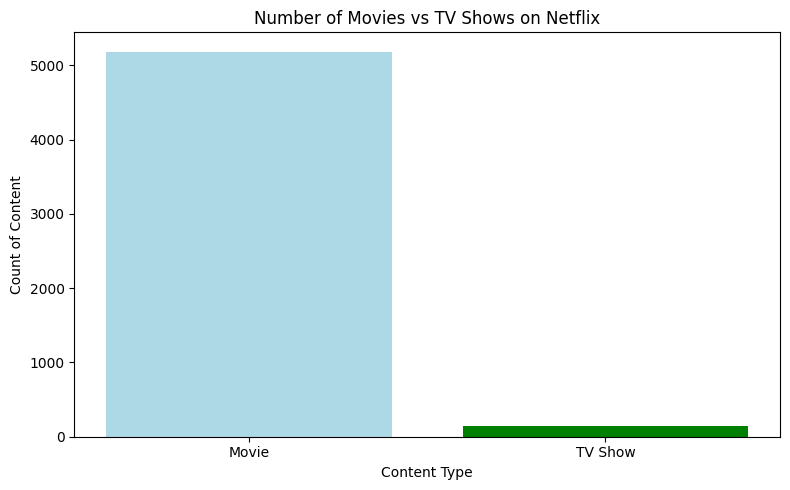

In [4]:
# bar char - Movies v/s TV Shows

# getting the count of each categories
type_count = df['type'].value_counts()

plt.figure(figsize=(8, 5))

plt.bar(type_count.index, type_count.values, color=['lightblue', 'green'])
plt.xlabel('Content Type')
plt.ylabel('Count of Content')
plt.title('Number of Movies vs TV Shows on Netflix')

plt.tight_layout()
plt.savefig('moves_vs_tvshows.png', dpi=300)
plt.show()


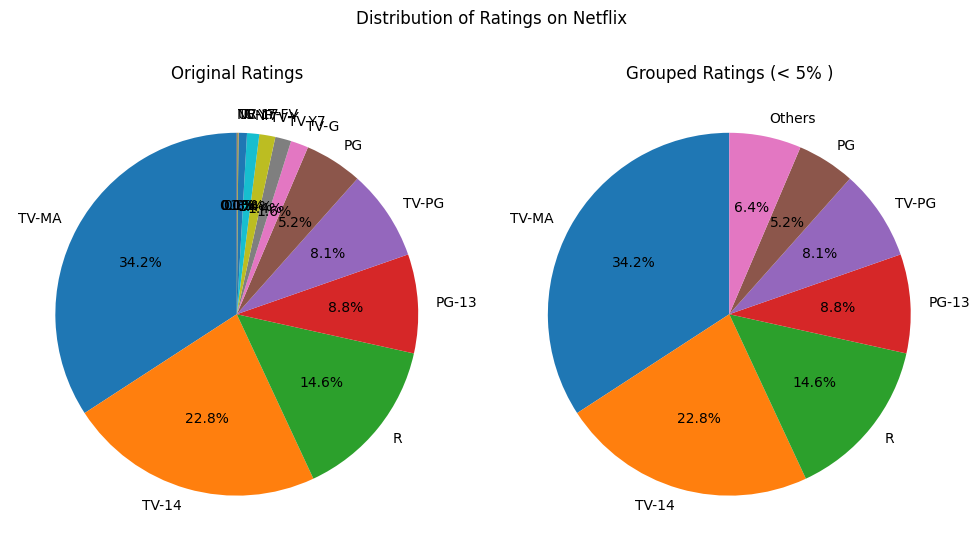

In [5]:
# pie chart - different ratings available on netflix

# finding the actual count for each rating
rating_count = df['rating'].value_counts() # some ratings are less that 5% so we show them as others

# converting the rating count into percentage 
rating_percentage = rating_count / rating_count.sum() * 100

# separating basesd on >= 5% and < 5%
main_rating = rating_percentage[rating_percentage >= 5]
others = rating_percentage[rating_percentage < 5]

# adding ratings < 5% as others
main_rating['Others'] = others.sum()


# plt.figure(figsize=(8, 8))
# plt.pie(main_rating, labels=main_rating.index, autopct='%1.1f%%', startangle=90)

# showing the orignial vs the cleaned pie chart
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].pie(rating_count, labels=rating_count.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('Original Ratings')
ax[1].pie(main_rating, labels=main_rating.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Grouped Ratings (< 5% )')
fig.suptitle('Distribution of Ratings on Netflix')

plt.tight_layout()
plt.savefig('ratings_distribution_netflix.png', dpi=300)
plt.show()

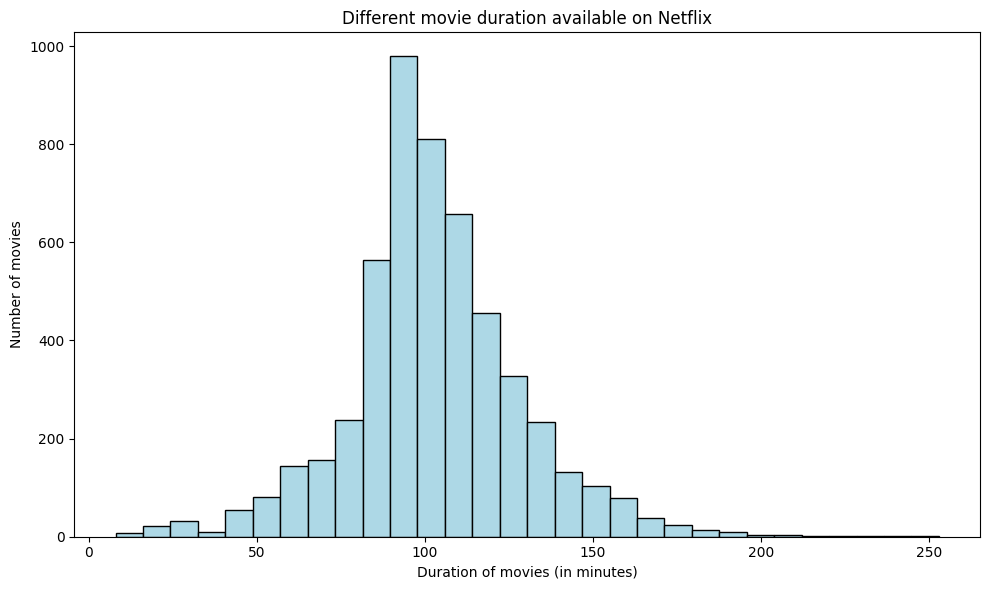

In [6]:
# histogram - visualising different duration of movies

movies_df = df[df['type'] == 'Movie'].copy()
movies_df['duration_int'] = movies_df['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(10, 6))
plt.hist(movies_df['duration_int'], bins=30, color='lightblue', edgecolor='black')
plt.xlabel('Duration of movies (in minutes)')
plt.ylabel('Number of movies')
plt.title('Different movie duration available on Netflix')

plt.tight_layout()
plt.savefig('movies_duration_histogram.png', dpi=300)
plt.show()

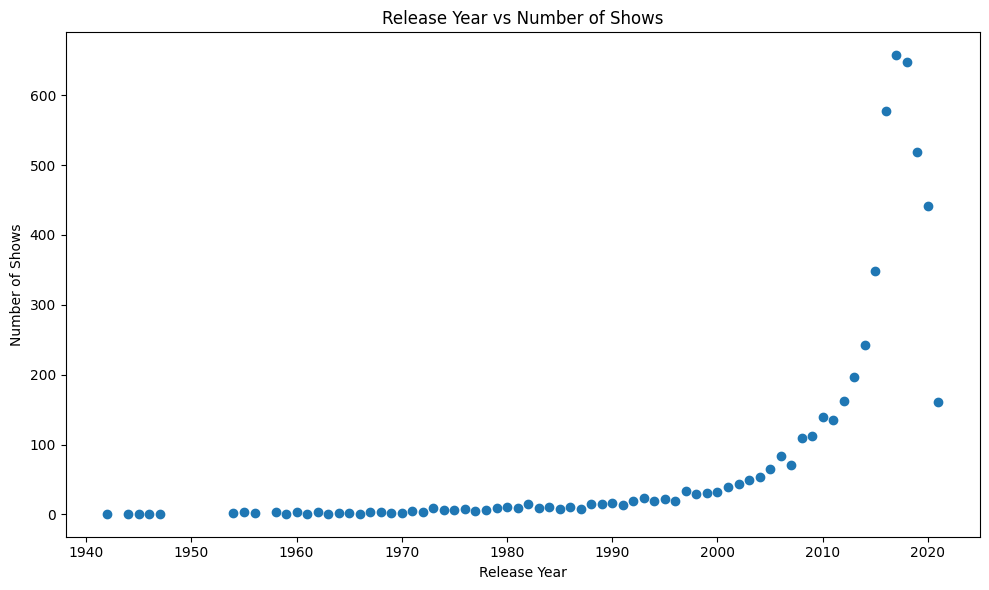

In [7]:
# scatter plot - visualising number of movies released in different year

release_year_count = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.scatter(release_year_count.index, release_year_count.values)
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Release Year vs Number of Shows')

plt.tight_layout()
plt.savefig('release_year_scatter.png', dpi=300)
plt.show()

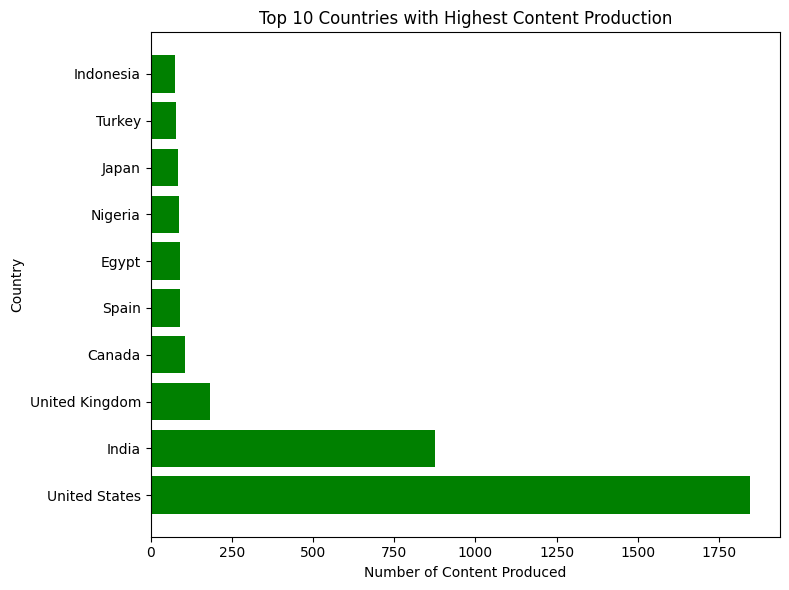

In [8]:
# horizontal histogram - top 10 countries with maximum content

country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 6))
plt.barh(country_count.index, country_count.values, color='green')
plt.title('Top 10 Countries with Highest Content Production')
plt.xlabel('Number of Content Produced')
plt.ylabel('Country')


plt.tight_layout()
plt.savefig('top_10_countires_in_content_production.png', dpi=300)
plt.show()

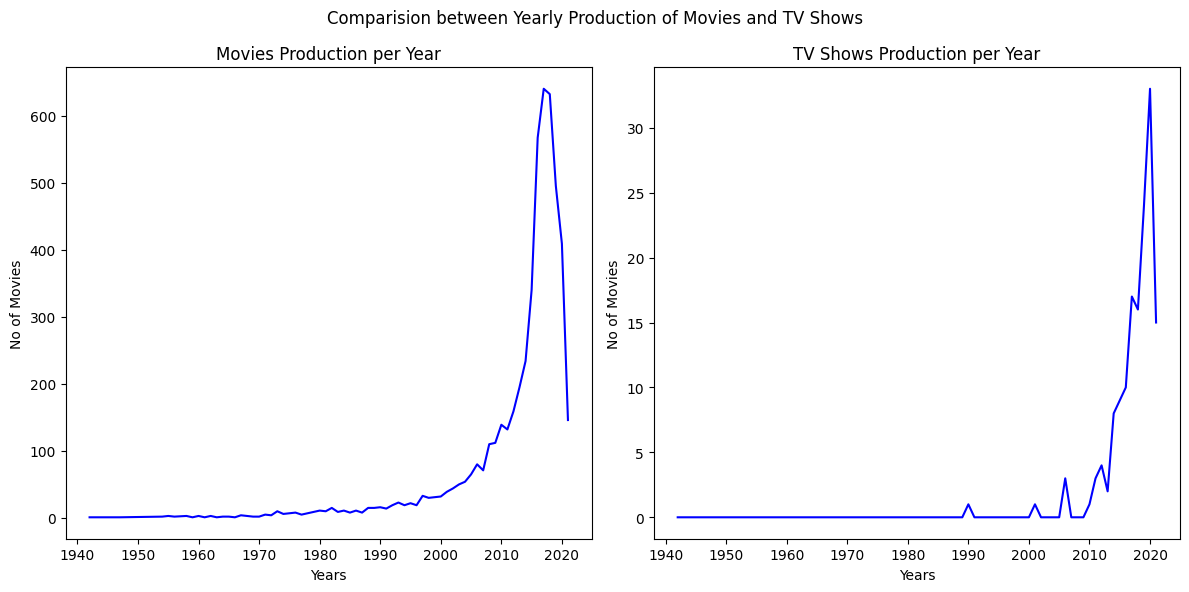

In [9]:
# subplot - Movies vs TV Shows yearly comparision

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# for movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_xlabel('Years')
ax[0].set_ylabel('No of Movies')
ax[0].set_title('Movies Production per Year')

# for TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color='blue')
ax[1].set_xlabel('Years')
ax[1].set_ylabel('No of Movies')
ax[1].set_title('TV Shows Production per Year')

fig.suptitle('Comparision between Yearly Production of Movies and TV Shows')

plt.tight_layout()
plt.show()